In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load iris dataset using seaborn

iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# EDA with questions from Chat GPT 

What are the dimensions (shape) of the dataset?

What are the column names and their data types?

How many unique classes are there in the target variable (species)?

What is the distribution of each class in the target variable?

Are there any missing values in the dataset? If so, how do you want to handle them?

What is the summary statistics (mean, median, min, max, etc.) of numerical features?

Can you visualize the distribution of each numerical feature using histograms?

Are there any outliers in the numerical features? If so, how do you want to handle them?

Can you visualize the relationship between pairs of numerical features using scatter plots?

Can you visualize the relationship between numerical features and the target variable using box plots or violin plots?

Are there any correlations between numerical features? If so, how strong are they?

Can you visualize the correlation matrix using a heatmap?

Are there any patterns or clusters within the data that you can identify visually?

Can you use dimensionality reduction techniques (e.g., PCA) to visualize the data in lower dimensions?

Are there any other interesting insights or observations that you can draw from the dataset?

#### Dimension or shape of the dataset

In [3]:
iris.shape

(150, 5)

#### Column names and data types

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### How many unique classes are there in the target variable (species)?

In [5]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

#### What is the distribution of each class in the target variable?

In [6]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

#### Are there any missing values in the dataset? If so, how do you want to handle them?

In [7]:
iris.isna().sum()
# no null values for each columns

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### What is the summary statistics (mean, median, min, max, etc.) of numerical features?

In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Can you visualize the distribution of each numerical feature using histograms?

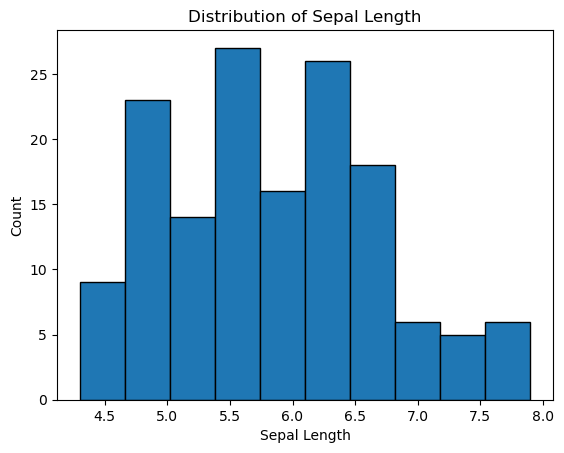

In [9]:
plt.hist(iris['sepal_length'], edgecolor='black');
plt.xlabel('Sepal Length')
plt.ylabel('Count')
plt.title('Distribution of Sepal Length')
plt.show()

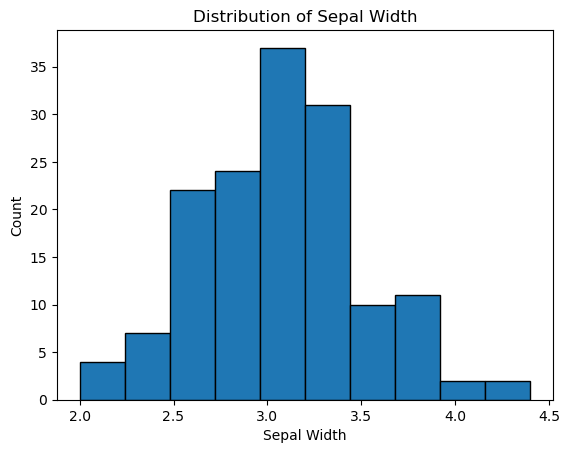

In [10]:
plt.hist(iris['sepal_width'], edgecolor='black');
plt.xlabel('Sepal Width')
plt.ylabel('Count')
plt.title('Distribution of Sepal Width')
plt.show()

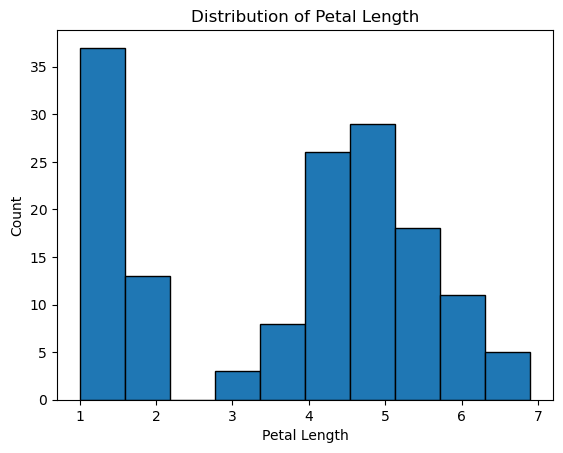

In [11]:
plt.hist(iris['petal_length'], edgecolor='black');
plt.xlabel('Petal Length')
plt.ylabel('Count')
plt.title('Distribution of Petal Length')
plt.show()

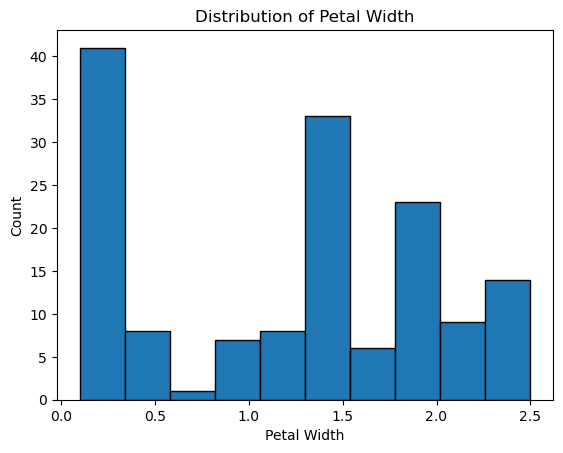

In [12]:
plt.hist(iris['petal_width'], edgecolor='black');
plt.xlabel('Petal Width')
plt.ylabel('Count')
plt.title('Distribution of Petal Width')
plt.show()

Text(0.5, 1.0, 'Sepal and Petal Length and Width')

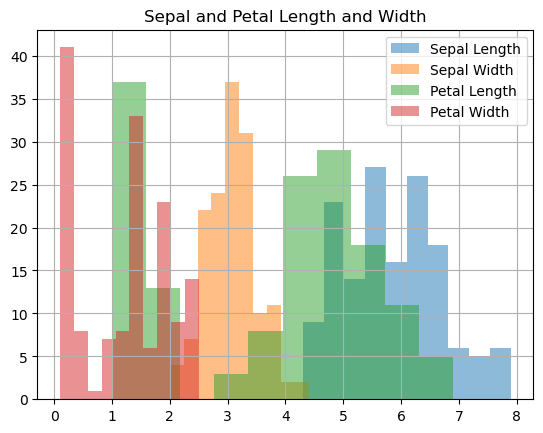

In [20]:
iris['sepal_length'].hist(alpha=0.5, label='Sepal Length')
iris['sepal_width'].hist(alpha=0.5, label='Sepal Width')
iris['petal_length'].hist(alpha=0.5, label='Petal Length')
iris['petal_width'].hist(alpha=0.5, label='Petal Width')
plt.legend()
plt.title('Sepal and Petal Length and Width')

#### Are there any outliers in the numerical features? If so, how do you want to handle them?

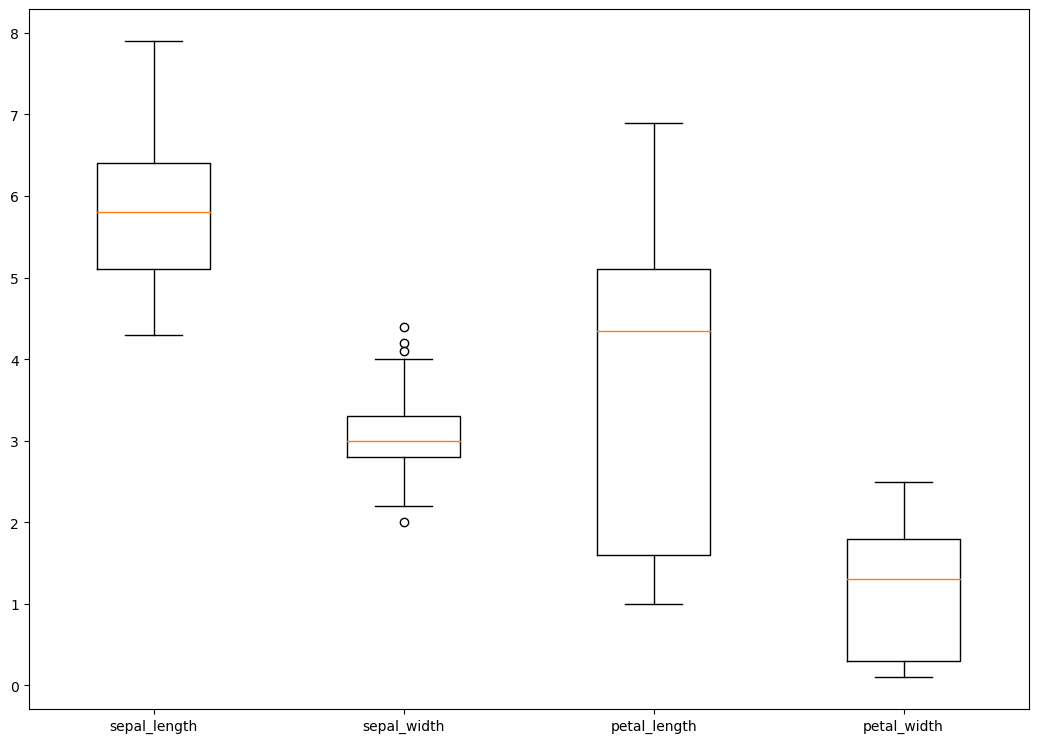

In [14]:
sepal_length = iris['sepal_length']
sepal_width = iris['sepal_width']
petal_length = iris['petal_length']
petal_width = iris['petal_width']
iris1 = [sepal_length, sepal_width, petal_length, petal_width]

fig = plt.figure(figsize =(10, 7))

labels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

plt.boxplot(iris1, labels=labels);
plt.show()

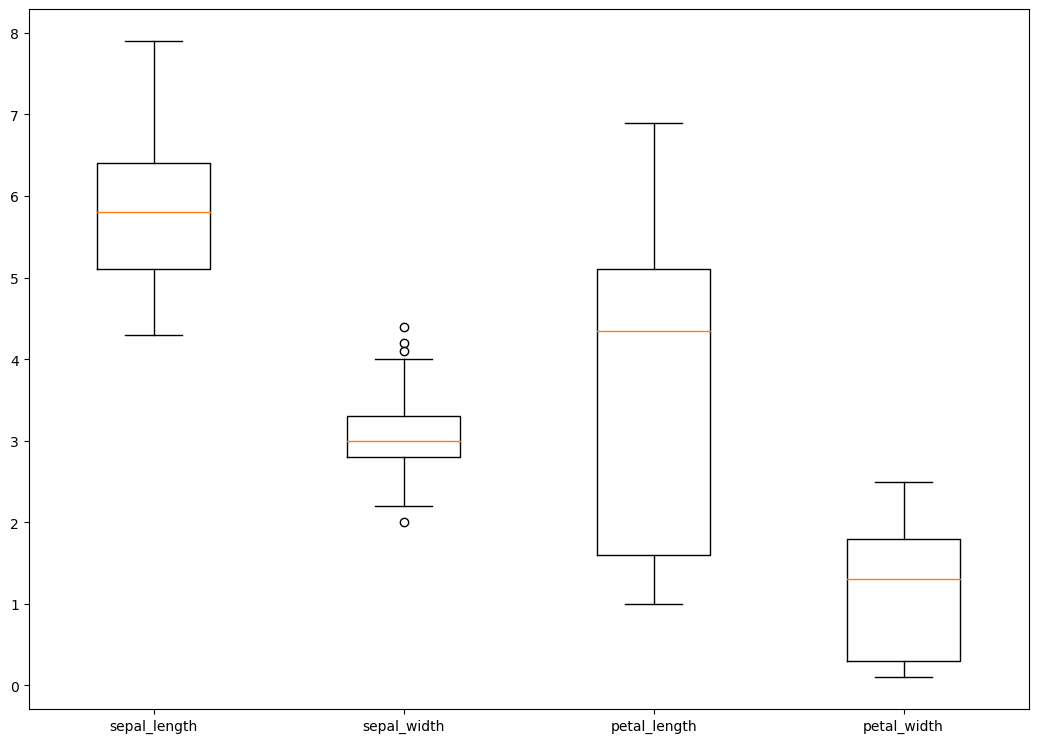

In [15]:
# Shortcut way by ChatGPT, removing the need to enumerate each columns and create label list

# Select only the numerical columns
iris_numerical = iris.drop(columns=['species'])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([0, 0, 1, 1])

# Plot the boxplot without specifying labels
plt.boxplot(iris_numerical.values)

# Set the x-axis tick labels to the column names
plt.xticks(range(1, len(iris_numerical.columns) + 1), iris_numerical.columns)

plt.show()


#### Can you visualize the relationship between pairs of numerical features using scatter plots?

In [29]:
iris3 = iris.drop(columns='species')
iris3

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


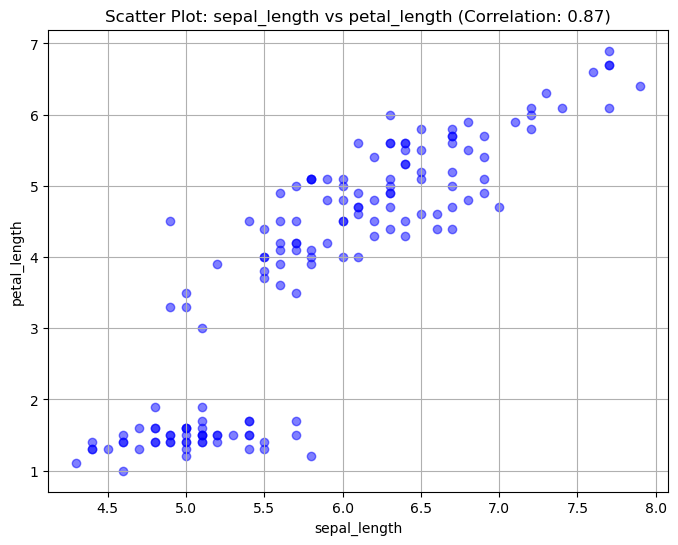

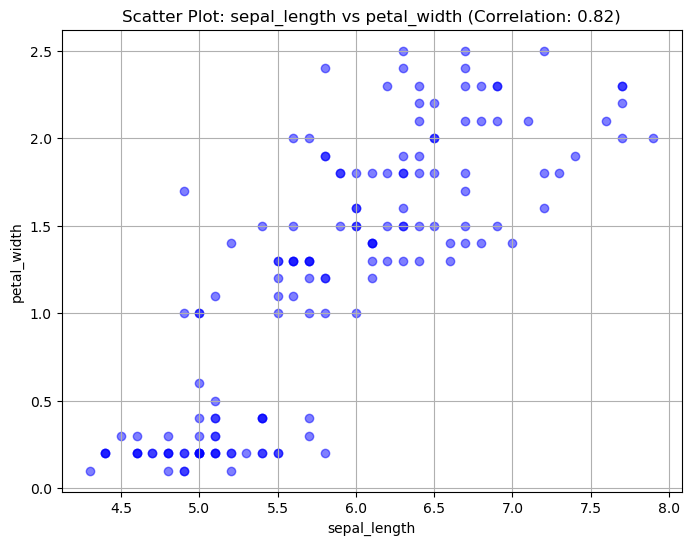

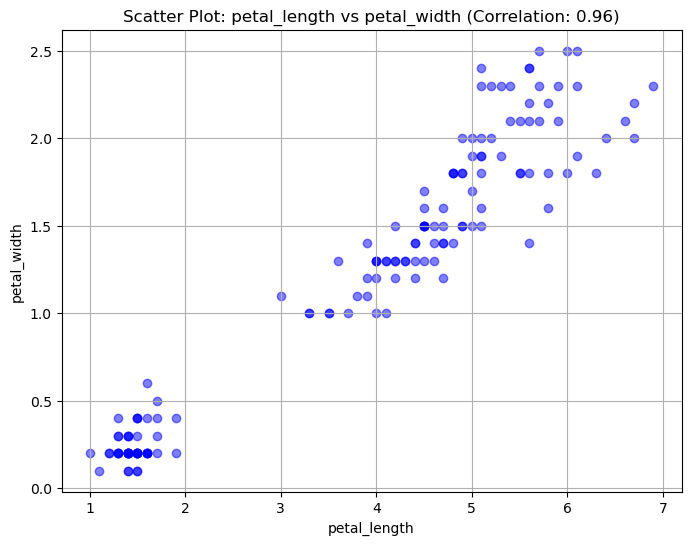

In [32]:
# I asked chatgpt to create a scatter plot based on a correlation matrix of dataframe iris
# Create a correlation matrix
correlation_matrix = iris3.corr()

# Set a threshold for correlation coefficient
threshold = 0.5

# Create scatter plots for pairs of features with correlation coefficients above the threshold
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            plt.figure(figsize=(8, 6))
            plt.scatter(iris.iloc[:, i], iris.iloc[:, j], c='blue', alpha=0.5)
            plt.xlabel(correlation_matrix.columns[i])
            plt.ylabel(correlation_matrix.columns[j])
            plt.title(f"Scatter Plot: {correlation_matrix.columns[i]} vs {correlation_matrix.columns[j]} (Correlation: {correlation_matrix.iloc[i, j]:.2f})")
            plt.grid(True)
            plt.show()


C:\Users\Kim Yuri\Documents\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.02, 'Pairplot of Variables of Iris Dataset')

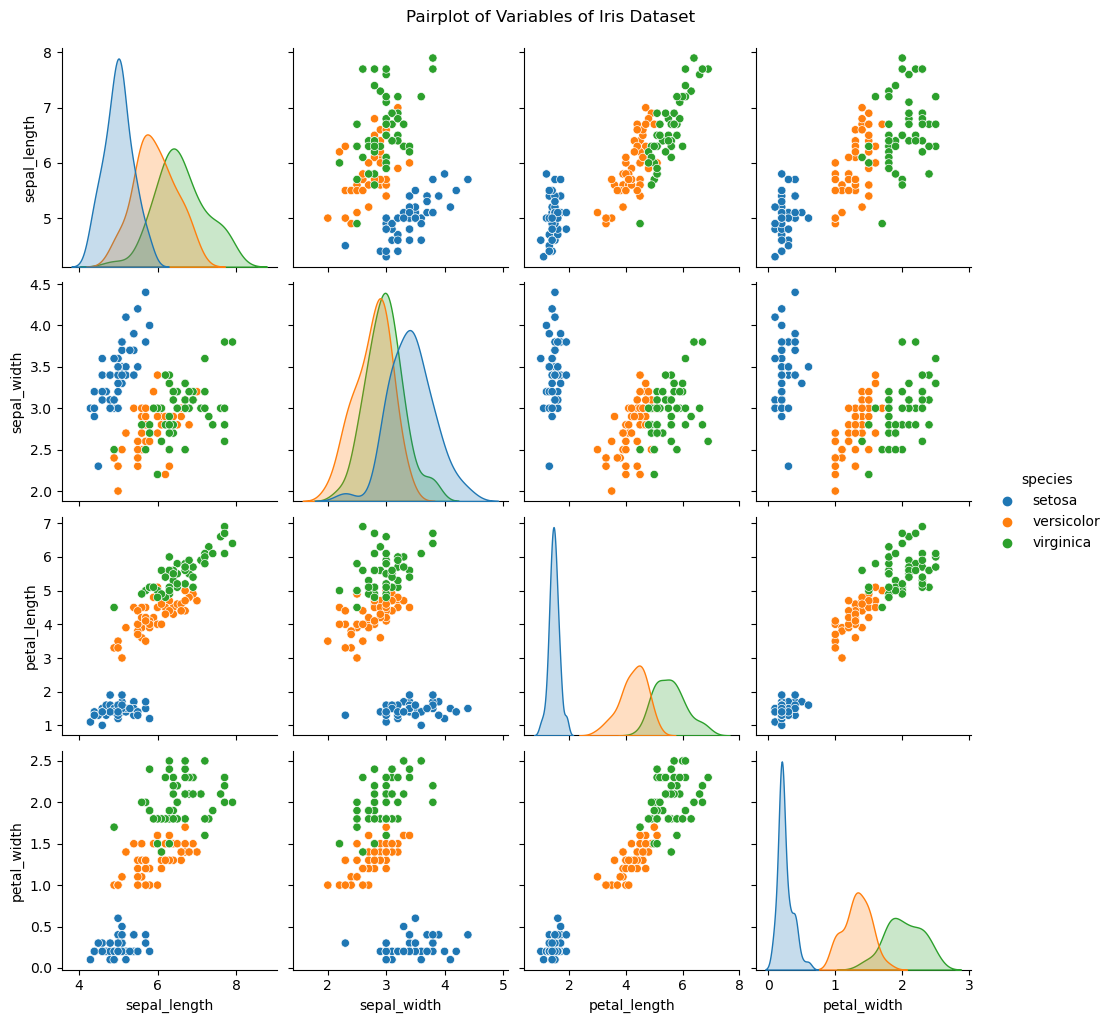

In [53]:
# Using a pairplot can also the answer better from the question above regarding relationship between numerical variables

sns.pairplot(iris, hue='species');
plt.suptitle('Pairplot of Variables of Iris Dataset', y=1.02)

#### Can you visualize the relationship between numerical features and the target variable using box plots or violin plots?

Text(0.5, 1.0, 'Sepal Length across Species')

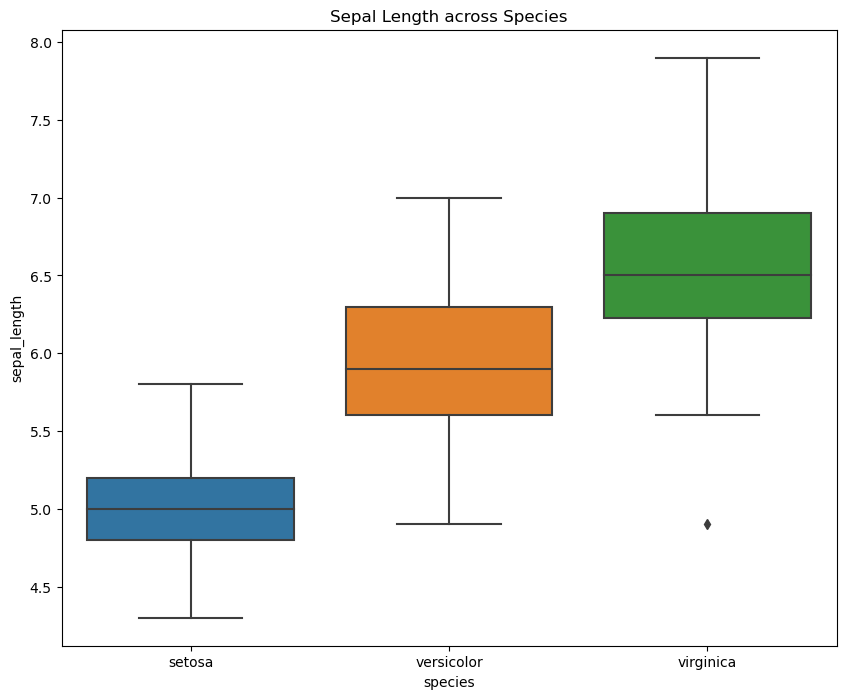

In [38]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'species', y = 'sepal_length', data = iris)
plt.title('Sepal Length across Species')

In [39]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [41]:
iris4 = pd.melt(iris, id_vars = ['species'], value_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris4

,species,variable,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,petal_width,1.9
597,virginica,petal_width,2.0
598,virginica,petal_width,2.3


Text(0.5, 1.0, 'Boxplot of Sepal and Petal Length and Width across Species')

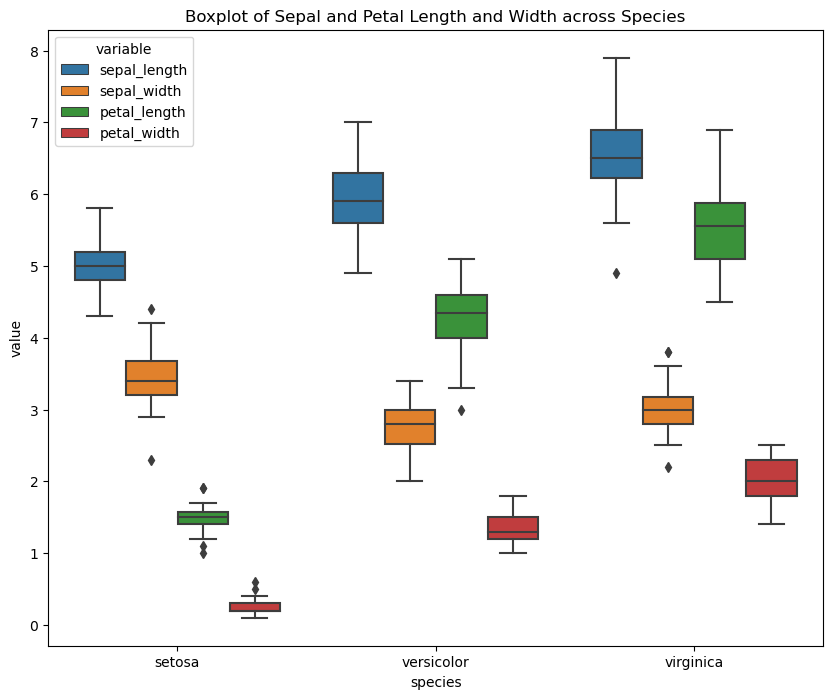

In [43]:
# Implement the sns.boxplot in one frame for all columns of iris dataset

plt.figure(figsize=(10,8))
sns.boxplot(x = 'species', y = 'value', hue = 'variable', data = iris4)
plt.title('Boxplot of Sepal and Petal Length and Width across Species')

#### Are there any correlations between numerical features? If so, how strong are they?

In [46]:
iris_corr = iris3.corr()
iris_corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


#### Can you visualize the correlation matrix using a heatmap?

<Axes: >

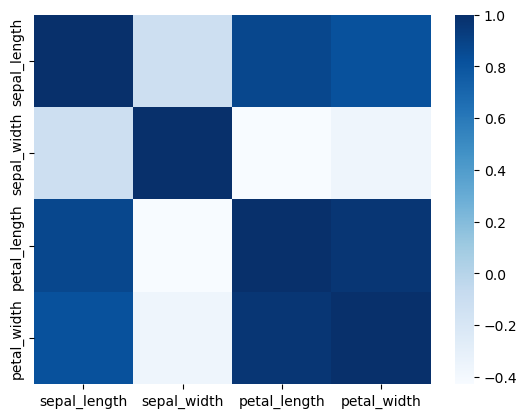

In [48]:
sns.heatmap(iris_corr, cmap = 'Blues')

#### Are there any patterns or clusters within the data that you can identify visually?

C:\Users\Kim Yuri\Documents\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.02, 'Pairplot of Variables of Iris Dataset')

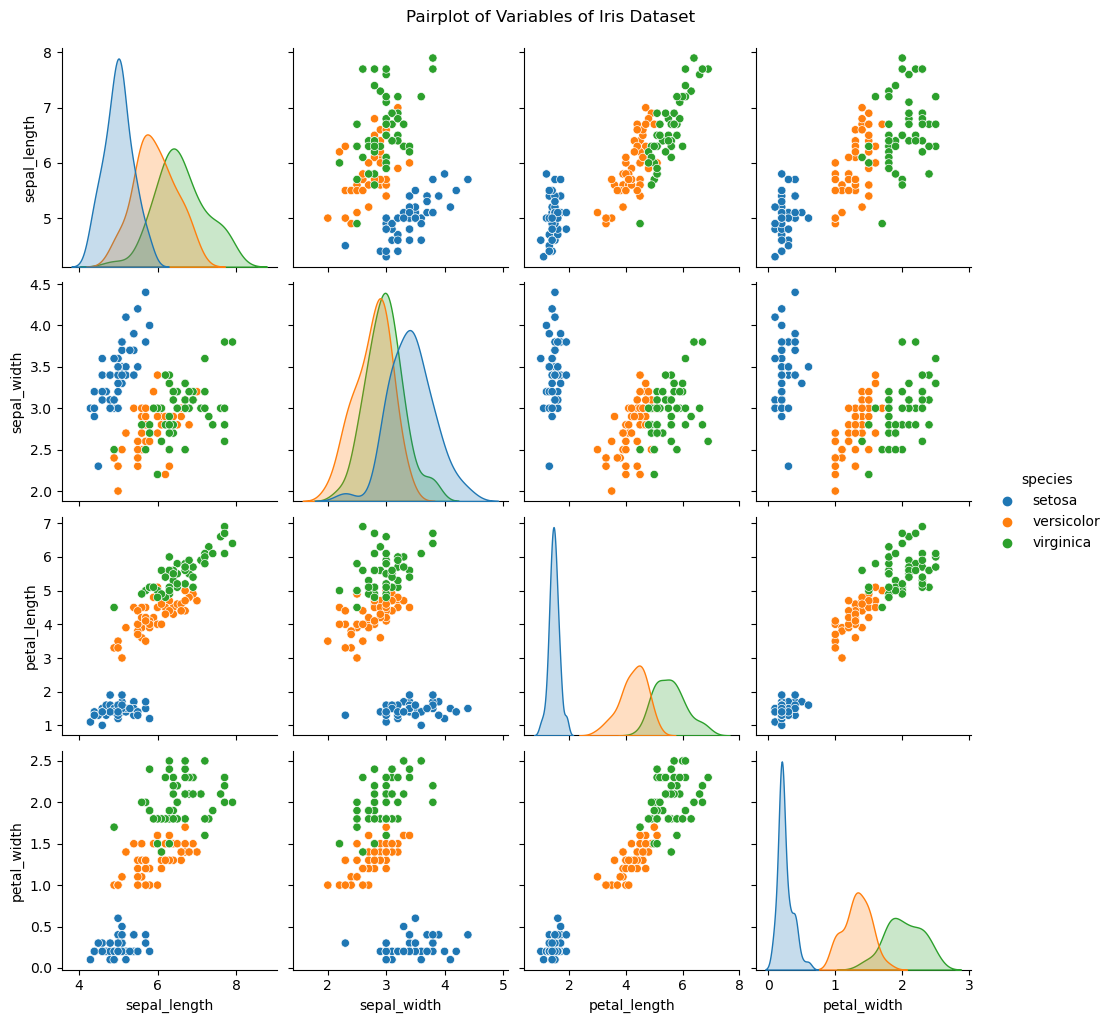

In [53]:
sns.pairplot(iris, hue='species');
plt.suptitle('Pairplot of Variables of Iris Dataset', y=1.02)

In [ ]:
# Virginica has higher petal length and width compared to versicolor and setosa
# Setosa has high sepal length and width despite having low petal length and petal width